http://cs229.stanford.edu/ps/ps1/ps1.pdf

# (a)

For Gaussian Discriminant Analysis (GDA), we wish to show that the posterior distribution of a label given an observation takes the form of logistic regression. That is, we wish to show that

$$p(y\mid x;\phi,\mu_{-1},\mu_1\Sigma) = \frac{1}{1 + e^{-y(\theta^T x + \theta_0)}}$$

where $\theta\in\mathbb{R}^n$ and the bias term $\theta_0$ are some appropriate functions of $\phi,\mu_{-1},\mu_1\Sigma$.

It is very interesting that GDA, a generative model with the strong modeling assumption that $p(x\mid y)$ is multivariate Gaussian, can be expressed as logistic regression, a discriminative model. Please see the cs229 class-notes-2 for details and discussion.

Given 

$$\begin{align*} 
p(y) &= \begin{cases}
  \phi          & \text{if} \; y = 1 \\
  1 - \phi     & \text{if} \; y = -1
\end{cases} \\
p(x\mid y=1) &= \frac{1}{(2\pi)^{n/2} \lvert \Sigma\rvert^{1/2}} \mathrm{exp}\bigg(-\frac{1}{2}(x - \mu_{1})^T \Sigma^{-1} (x - \mu_{1}) \bigg) \\
p(x\mid y=-1) &= \frac{1}{(2\pi)^{n/2} \lvert \Sigma\rvert^{1/2}} \mathrm{exp}\bigg(-\frac{1}{2}(x - \mu_{-1})^T \Sigma^{-1} (x - \mu_{-1}) \bigg) \\
\end{align*}$$


Define

$$\begin{align*}
A &\equiv -\frac{1}{2}(x - \mu_{1})^T \Sigma^{-1} (x - \mu_{1}) \\
B &\equiv -\frac{1}{2}(x - \mu_{-1})^T \Sigma^{-1} (x - \mu_{-1}) \\
C &\equiv \frac{1}{(2\pi)^{n/2} \lvert \Sigma\rvert^{1/2}}
\end{align*}$$

so that

$$\begin{align*} 
p(x\mid y=1)  &= C e^A \\
p(x\mid y=-1) &= C e^B \\
\end{align*}$$

Bayes formula gives

$$\begin{align*} 
p(y=1\mid x) &= \frac{p(x\mid y=1) p(y=1)}{p(x\mid y=1) p(y=1) + p(x\mid y=-1) p(y=-1)} \\
           &= \frac{Ce^A \phi}{Ce^A \phi + Ce^B (1 - \phi)} \\
           &= \frac{e^A \phi}{e^A \phi + e^B (1 - \phi)} \\
           &= \frac{1}{1 + \frac{1 - \phi}{\phi} e^{B - A}} \\
           &= \frac{1}{1 + e^{(B - A + \mathrm{ln}(1 - \phi) - \mathrm{ln}\phi)}} \\
           &= \frac{1}{1 + e^{- 1 (A -B + \mathrm{ln}\phi - \mathrm{ln}(1 - \phi))}} \\
           &= \frac{1}{1 + e^{- y (A -B + \mathrm{ln}\phi - \mathrm{ln}(1 - \phi))}} \\
\end{align*}$$

And similarly for $y = -1$:

$$\begin{align*} 
p(y=-1\mid x) &= \frac{p(x\mid y=-1) p(y=-1)}{p(x\mid y=1) p(y=1) + p(x\mid y=-1) p(y=-1)} \\
           &= \frac{Ce^B (1 - \phi)}{Ce^A \phi + Ce^B (1 - \phi)} \\
           &= \frac{1}{\frac{\phi}{1 - \phi} e^{A - B} + 1} \\
           &= \frac{1}{1 + e^{(A - B + \mathrm{ln}\phi - \mathrm{ln}(1 - \phi))}} \\
           &= \frac{1}{1 + e^{- y (A - B + \mathrm{ln}\phi - \mathrm{ln}(1 - \phi))}} \\
\end{align*}$$

Therefore, in both cases,

$$p(y\mid x) = \frac{1}{1 + e^{- y (A - B + \mathrm{ln}\phi - \mathrm{ln}(1 - \phi))}}\tag{1}$$

Note that

$$\begin{align*}
A-B &= -\frac{1}{2}(x - \mu_{1})^T \Sigma^{-1} (x - \mu_{1}) + \frac{1}{2}(x - \mu_{-1})^T \Sigma^{-1} (x - \mu_{-1})\\
                    &= -\frac{1}{2}\big[x^T\Sigma^{-1}x-x^T\Sigma^{-1}\mu_1-\mu_1^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1-\big(x^T\Sigma^{-1}x-x^T\Sigma^{-1}\mu_{-1}-\mu_{-1}^T\Sigma^{-1}x+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big)\big]  \\
                    &= -\frac{1}{2}\big[-x^T\Sigma^{-1}\mu_1-\mu_1^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1-\big(-x^T\Sigma^{-1}\mu_{-1}-\mu_{-1}^T\Sigma^{-1}x+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big)\big]  \\
                    &= -\frac{1}{2}\big[-(x^T\Sigma^{-1}\mu_1)^T-\mu_1^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1-\big(-(x^T\Sigma^{-1}\mu_{-1})^T-\mu_{-1}^T\Sigma^{-1}x+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big)\big]  \\
                    &= -\frac{1}{2}\big[-\mu_1^T\Sigma^{-1}x-\mu_1^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1-\big(-\mu_{-1}^T\Sigma^{-1}x-\mu_{-1}^T\Sigma^{-1}x+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big)\big]  \\
                    &= -\frac{1}{2}\big[-2\mu_1^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1-\big(-2\mu_{-1}^T\Sigma^{-1}x+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big)\big]  \\
                    &= -\frac{1}{2}\big[-2\mu_1^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1+2\mu_{-1}^T\Sigma^{-1}x-\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]  \\
                    &= -\frac{1}{2}\big[2\mu_{-1}^T\Sigma^{-1}x-2\mu_1^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1-\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]  \\
                    &= -\frac{1}{2}\big[2(\mu_{-1}-\mu_1)^T\Sigma^{-1}x+\mu_1^T\Sigma^{-1}\mu_1-\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]  \\
                    &= (\mu_1-\mu_{-1})^T\Sigma^{-1}x+\frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1  \\
\end{align*}$$

Define

$$\begin{align*}
\theta &\equiv \Sigma^{-1}(\mu_1-\mu_{-1}) \\
\theta_0 &\equiv \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 - \mathrm{ln}\Big(\frac{1 - \phi}{\phi}\Big) \\
\end{align*}$$

So 

$$\begin{align*}
\theta^Tx + \theta_0 &= \big(\Sigma^{-1}(\mu_1-\mu_{-1})\big)^Tx + \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 - \mathrm{ln}\Big(\frac{1 - \phi}{\phi}\Big) \\
                    &= (\mu_1-\mu_{-1})^T\Sigma^{-1}x + \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 + \mathrm{ln}\Big(\frac{\phi}{1 - \phi}\Big) \\
                    &= A - B + \mathrm{ln}\phi - \mathrm{ln}(1 - \phi)  \\
\end{align*}$$

And (1) becomes

$$p(y\mid x) = \frac{1}{1 + e^{- y (A - B + \mathrm{ln}\phi - \mathrm{ln}(1 - \phi))}} = \frac{1}{1 + e^{-y(\theta^T x + \theta_0)}}$$

which is in the form of the logistic function.

# (b)

We will handle this in part (c)

# (c)

First note that

$$\begin{align*} 
p(y) &= \begin{cases}
  \phi          & \text{if} \; y = 1 \\
  1 - \phi     & \text{if} \; y = -1
\end{cases} \\\\
   &=\phi^{1\{y=1\}}(1-\phi)^{1\{y=-1\}}
\end{align*}$$

And the $\ln$ of this is

$$\begin{align*} 
\ln(p(y))&=\ln(\phi^{1\{y=1\}}(1-\phi)^{1\{y=-1\}})\\
    &=\ln(\phi^{1\{y=1\}}) + \ln((1-\phi)^{1\{y=-1\}})\\
    &={1\{y=1\}}\ln(\phi) + {1\{y=-1\}}\ln((1-\phi))
\end{align*}$$

Hence the log-likelihood is

$$\begin{align*} 
\ell(\phi,\mu_{-1},\mu_1,\Sigma) &= \mathrm{ln}\prod_{i=1}^mp(x^{(i)},y^{(i)};\phi,\mu_{-1},\mu_1\Sigma) \\
     &= \mathrm{ln}\prod_{i=1}^mp(x^{(i)}\mid y^{(i)};\phi,\mu_{-1},\mu_1,\Sigma) p(y^{(i)};\phi)\\
     &= \sum_{i=1}^m\mathrm{ln}p(x^{(i)}\mid y^{(i)};\phi,\mu_{-1},\mu_1,\Sigma)+ \sum_{i=1}^m\mathrm{ln}p(y^{(i)};\phi)\\
     &\approxeq \sum_{i=1}^m\big[\frac{1}{2}\mathrm{ln}\frac{1}{\lvert\Sigma\rvert}-\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^T\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}})+{1\{y^{(i)}=1\}}\ln(\phi) + {1\{y^{(i)}=-1\}}\ln(1-\phi)\big]\tag{2}
\end{align*}$$

In the last quasi-equality, we have discarded the term $\ln\big(\frac{1}{(2\pi)^{n/2}}\big)$ since this is irrelevant to determining maxima.

To maximize the log-likelihood in $\phi$, let's compute the partial derivative of (2) with respect to $\phi$ and set it equal to zero:

$$\begin{align*} 
0=\frac{\partial\ell}{\partial\phi} &= \sum_{i=1}^m{1\{y^{(i)}=1\}}\frac1{\phi} - \sum_{i=1}^m{1\{y^{(i)}=-1\}}\frac1{1-\phi}\\
\end{align*}$$

Hence

$$\begin{align*} 
\sum_{i=1}^m{1\{y^{(i)}=-1\}}\frac1{1-\phi} = \sum_{i=1}^m{1\{y^{(i)}=1\}}\frac1{\phi}\\
\end{align*}$$

Or

$$\begin{align*} 
\frac1{1-\phi}\sum_{i=1}^m{1\{y^{(i)}=-1\}} = \frac1{\phi}\sum_{i=1}^m{1\{y^{(i)}=1\}}\\
\end{align*}$$

Multiplying both sides by $\phi(1-\phi)$, we get

$$\begin{align*} 
\phi\sum_{i=1}^m{1\{y^{(i)}=-1\}} &= (1-\phi)\sum_{i=1}^m{1\{y^{(i)}=1\}}\\
    &= \sum_{i=1}^m{1\{y^{(i)}=1\}} - \phi\sum_{i=1}^m{1\{y^{(i)}=1\}}
\end{align*}$$

Hence

$$\begin{align*} 
\sum_{i=1}^m{1\{y^{(i)}=1\}} &= \phi\sum_{i=1}^m{1\{y^{(i)}=-1\}} + \phi\sum_{i=1}^m{1\{y^{(i)}=1\}}\\
    &= \phi\sum_{i=1}^m\big[1\{y^{(i)}=-1\} + 1\{y^{(i)}=1\}\big]\\
    &= \phi\sum_{i=1}^m1\\
    &= \phi m
\end{align*}$$

Hence

$$\begin{align*} 
\phi = \frac1m\sum_{i=1}^m{1\{y^{(i)}=1\}}
\end{align*}$$


Now let's compute the gradient of (2) with respect to $\mu_{-1}$:

$$\begin{align*} 
\nabla_{\mu_{-1}}\ell &= -\frac{1}{2}\sum_{i=1}^m\nabla_{\mu_{-1}}(x^{(i)}-\mu_{y^{(i)}})^T\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}})\\ 
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}(x^{(i)}-\mu_{-1})^T\Sigma^{-1}(x^{(i)}-\mu_{-1})\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}\big[x^{(i)^T}\Sigma^{-1}x^{(i)}-x^{(i)^T}\Sigma^{-1}\mu_{-1}-\mu_{-1}^T\Sigma^{-1}x^{(i)}+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}\big[-x^{(i)^T}\Sigma^{-1}\mu_{-1}-\mu_{-1}^T\Sigma^{-1}x^{(i)}+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}\big[-(x^{(i)^T}\Sigma^{-1}\mu_{-1})^T-\mu_{-1}^T\Sigma^{-1}x^{(i)}+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}\big[-\mu_{-1}^T\Sigma^{-1}x^{(i)}-\mu_{-1}^T\Sigma^{-1}x^{(i)}+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}\big[-2\mu_{-1}^T\Sigma^{-1}x^{(i)}+\mu_{-1}^T\Sigma^{-1}\mu_{-1}\big]\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}\big[\mu_{-1}^T\Sigma^{-1}\mu_{-1}-2\mu_{-1}^T\Sigma^{-1}x^{(i)}\big]\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\nabla_{\mu_{-1}}tr\big[\mu_{-1}^T\Sigma^{-1}\mu_{-1}-2\mu_{-1}^T\Sigma^{-1}x^{(i)}\big]\\
    &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}\big[\nabla_{\mu_{-1}}tr(\mu_{-1}^T\Sigma^{-1}\mu_{-1})-2\nabla_{\mu_{-1}}tr(\mu_{-1}^T\Sigma^{-1}x^{(i)})\big]\tag{3}
\end{align*}$$

The fifth equality follows because $r^T=r$ for all $r\in\mathbb{R}$. The next-to-last equality follows because $tr(r)=r$ for all $r\in\mathbb{R}$. The last equality follows because the trace and gradient operators are both linear.

Note that

$$\begin{align*} 
\nabla_{\mu_{-1}}tr(\mu_{-1}^T\Sigma^{-1}\mu_{-1}) &= \nabla_{(\mu_{-1}^T)^T}tr(\mu_{-1}^T\Sigma^{-1}\mu_{-1}) \\
    &= \big[\nabla_{\mu_{-1}^T}tr(\mu_{-1}^T\Sigma^{-1}\mu_{-1}I)\big]^T \\
    &= \big[I\mu_{-1}^T\Sigma^{-1}+I\mu_{-1}^T\Sigma^{-T}\big]^T \\
    &= \big[\mu_{-1}^T\Sigma^{-1}+\mu_{-1}^T\Sigma^{-T}\big]^T \\
    &= \big[\mu_{-1}^T\Sigma^{-T}+\mu_{-1}^T\Sigma^{-T}\big]^T \\
    &= 2\big[\mu_{-1}^T\Sigma^{-T}\big]^T \\
    &= 2\Sigma^{-1}\mu_{-1} \\
\end{align*}$$

The second equality follows from cs229-notes1, p.9, eq.2 ($I=1\in\mathbb{R}$) and the third equality follows from eq.3.

Also note that

$$\begin{align*} 
\nabla_{\mu_{-1}}tr(\mu_{-1}^T\Sigma^{-1}x^{(i)}) &= \nabla_{(\mu_{-1}^T)^T}tr(\mu_{-1}^T\Sigma^{-1}x^{(i)}) \\
    &= \big[\nabla_{\mu_{-1}^T}tr(\mu_{-1}^T\Sigma^{-1}x^{(i)})\big]^T \\
    &= \big[(\Sigma^{-1}x^{(i)})^T\big]^T \\
    &= \Sigma^{-1}x^{(i)} \\
\end{align*}$$

Hence (3) becomes

$$\begin{align*} 
0 = \nabla_{\mu_{-1}}\ell &= -\frac{1}{2}\sum_{i:y^{(i)}=-1}[2\Sigma^{-1}\mu_{-1}-2\Sigma^{-1}x^{(i)}] \\
    &= \sum_{i:y^{(i)}=-1}[\Sigma^{-1}x^{(i)}-\Sigma^{-1}\mu_{-1}] \\
    &= \sum_{i=1}^m1\{y^{(i)}=-1\}[\Sigma^{-1}x^{(i)}-\Sigma^{-1}\mu_{-1}] \\
    &= \Sigma^{-1}\sum_{i=1}^m1\{y^{(i)}=-1\}(x^{(i)}-\mu_{-1}) \\
\end{align*}$$

Since $\Sigma$ is invertible, then $\Sigma^{-1}$ is invertible and the first equality follows:

$$\begin{align*} 
0 = \sum_{i=1}^m1\{y^{(i)}=-1\}(x^{(i)}-\mu_{-1}) = \sum_{i=1}^m1\{y^{(i)}=-1\}x^{(i)}-\sum_{i=1}^m1\{y^{(i)}=-1\}\mu_{-1} \\
\end{align*}$$

Or

$$\begin{align*} 
\mu_{-1}\sum_{i=1}^m1\{y^{(i)}=-1\} = \sum_{i=1}^m1\{y^{(i)}=-1\}\mu_{-1} = \sum_{i=1}^m1\{y^{(i)}=-1\}x^{(i)}\\
\end{align*}$$

Or

$$\begin{align*} 
\mu_{-1} = \frac{\sum_{i=1}^m1\{y^{(i)}=-1\}x^{(i)}}{\sum_{i=1}^m1\{y^{(i)}=-1\}}\\
\end{align*}$$

The computation for $\mu_1$ is similar.

To find the maximum in $\Sigma$, we will find the maximum in $S\equiv\Sigma^{-1}$. For intuition, define $f(x)=-(x-2)^2$ for $x\in\mathbb{R}$. We know that the maximum of $f(x)$ is at $x_0=2$. But if we find the maximum of $f\big(\frac{1}{\alpha}\big)$ over all $\alpha\in\mathbb{R}$, then the maximum is at $\alpha_0=\frac{1}{2}=\frac{1}{x_0}=x_0^{-1}$.

Recall (from lin-alg-review-notes) that $\lvert S\rvert=\lvert \Sigma^{-1}\rvert=\frac{1}{\lvert\Sigma\rvert}$. Then

$$\begin{align*} 
\nabla_S\ell &= \sum_{i=1}^m\nabla_S\big[\frac{1}{2}\mathrm{ln}\frac{1}{\lvert\Sigma\rvert}-\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^T\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}})\big] \\
    &= \sum_{i=1}^m\nabla_S\big[\frac{1}{2}\mathrm{ln}\lvert S\rvert-\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^TS(x^{(i)}-\mu_{y^{(i)}})\big] \\
    &= \sum_{i=1}^m\nabla_S\big[\frac{1}{2}\mathrm{ln}\lvert S\rvert-\frac{1}{2}b_i^TSb_i\big] \\
    &= \sum_{i=1}^m\big[\frac{1}{2\lvert S\rvert}\nabla_S\lvert S\rvert-\frac{1}{2}\nabla_Sb_i^TSb_i\big] \tag{4} \\
\end{align*}$$

where we have defined $b_i\equiv x^{(i)}-\mu_{y^{(i)}}$. Then

$$\begin{align*} 
\nabla_S\lvert S\rvert=\lvert S\rvert(S^{-1})^T=\lvert S\rvert\Sigma^T=\lvert S\rvert\Sigma\\
\end{align*}$$

The first equality follows from class-notes-1, p.9, eq.4 and the last equality follows because $\Sigma$ is symmetric.

Also note that

$$\begin{align*} 
\nabla_Sb_i^TSb_i=\nabla_Str(b_i^TSb_i)=\nabla_Str(Sb_ib_i^T)=(b_ib_i^T)^T=b_ib_i^T=(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T
\end{align*}$$

The first equality follows because $b_i^TSb_i\in\mathbb{R}$. The second equality follows because $b_i^TSb_i$ is a square matrix that is the product of a $1\times n$ matrix ($b_i^T$) and a $n\times1$ matrix ($Sb_i$). The trace operator commutes in this case. The third equality follows from class-notes-1, p.9, eq.1.

Setting the gradient equal to zero, (4) becomes

$$\begin{align*} 
0=\nabla_S\ell &= \sum_{i=1}^m\big[\frac{1}{2\lvert S\rvert}\nabla_S\lvert S\rvert-\frac{1}{2}\nabla_Sb_i^TSb_i\big] \\
    &= \sum_{i=1}^m\big[\frac{1}{2\lvert S\rvert}\lvert S\rvert\Sigma-\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T\big]\\
    &= \sum_{i=1}^m\big[\frac{1}{2}\Sigma-\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T\big]
\end{align*}$$

Multiplying through by $2$, we get

$$\begin{align*} 
0 &= \sum_{i=1}^m\big[\Sigma-(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T\big] \\
     &= \sum_{i=1}^m\Sigma-\sum_{i=1}^m\big[(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T\big] \\
     &= m\Sigma-\sum_{i=1}^m(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T
\end{align*}$$

or

$$\begin{align*} 
\Sigma=\frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T
\end{align*}$$

Although not required by the problem, I found it very helpful to plot the decision boundary for this problem using the data from problem 1:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_X = pd.read_csv('./logistic_x.txt', sep='\ +', header=None, engine='python')
print("type(df_X)={} and df_X.shape={}".format(type(df_X),df_X.shape))
print("And the head:")
df_X[:3]

type(df_X)=<class 'pandas.core.frame.DataFrame'> and df_X.shape=(99, 2)
And the head:


,0,1
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576


In [3]:
df_y = pd.read_csv('./logistic_y.txt', sep='\ +', header=None, engine='python')
df_y = df_y.astype(int)
print("type(df_y)={} and df_y.shape={}".format(type(df_y),df_y.shape))
print("And the head:")
df_y[:3]

type(df_y)=<class 'pandas.core.frame.DataFrame'> and df_y.shape=(99, 1)
And the head:


,0
0,-1
1,-1
2,-1


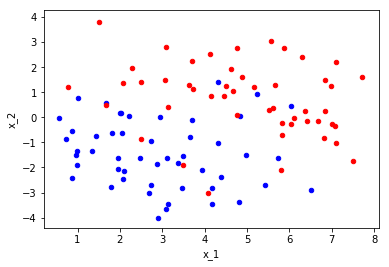

In [4]:
# Let's append the labels to the data
df_X['label'] = df_y[0].values
# And let's take a look at the two data points, called "0" and "1", for each observation, colored coded by label:
ax = plt.axes()
df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')
plt.xlabel('x_1')
plt.ylabel('x_2')

In [5]:
# convert X's to numpy array
X = df_X[[0, 1]].values
print("type(X)={}  X.shape={}".format(type(X),X.shape))

type(X)=<class 'numpy.ndarray'>  X.shape=(99, 2)


In [6]:
# convert y's to numpy array
y = df_y.values.flatten()
cntones=sum([y[i] if y[i]==1 else 0 for i in range(len(y))])
cntnegones=sum([y[i] if y[i]==-1 else 0 for i in range(len(y))])
print("type(y)={}  y.shape={}  number of ones={}  number of negative ones={}"
      .format(type(y),y.shape,cntones, cntnegones))

type(y)=<class 'numpy.ndarray'>  y.shape=(99,)  number of ones=49  number of negative ones=-50


Recall our estimates for $\mu_{-1}$ and $\mu_1$:

$$\begin{align*} 
\mu_{-1} = \frac{\sum_{i=1}^m1\{y^{(i)}=-1\}x^{(i)}}{\sum_{i=1}^m1\{y^{(i)}=-1\}}\\
\end{align*}$$

$$\begin{align*} 
\mu_{1} = \frac{\sum_{i=1}^m1\{y^{(i)}=1\}x^{(i)}}{\sum_{i=1}^m1\{y^{(i)}=1\}}\\
\end{align*}$$

In [7]:
# let's compute the mean vectors
num_features=X.shape[1]
print("num_features={}".format(num_features))

mun1n=np.sum(X[y==-1],axis=0)
mun1d=np.sum([y==-1])
mun1=(mun1n/mun1d).reshape(num_features,1) # reshape to column vector (rather than array)
print("mun1n={}  mun1d={}\nmun1={}".format(mun1n,mun1d,mun1))

mu1n=np.sum(X[y==1],axis=0)
mu1d=np.sum([y==1])
mu1=(mu1n/mu1d).reshape(num_features,1)
print("mu1n={}  mu1d={}\nmu1={}".format(mu1n,mu1d,mu1))

num_features=2
mun1n=[ 146.53407208  -72.23823447]  mun1d=50
mun1=[[ 2.93068144]
 [-1.44476469]]
mu1n=[ 241.87216715   37.61822942]  mu1d=49
mu1=[[ 4.93616668]
 [ 0.76771897]]


Recall our estimate for $\Sigma$:

$$\begin{align*} 
\Sigma=\frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T
\end{align*}$$

In [8]:
# let's compute Sigma
m=X.shape[0]
Sigma=np.zeros((num_features,num_features))
for i in range(m):
    # reshape to column vector so that .dot is 2x1 dot 1x2 = 2x2
    # rather than 2, dot 2, = 1
    xi = X[i,:].reshape(num_features,1)
    muyi = mu1 if y[i]==1 else mun1 # this is already a column vector
    # uncomment if you want to see some rows
#    if np.mod(i,11)==0:
#        print("i={}  xi={}  muyi={}".format(i,xi,muyi))
    Sigma += (xi-muyi).dot((xi-muyi).T)
Sigma = 1/m * Sigma
print("m={}  Sigma.shape={}".format(m,Sigma.shape))
print("Sigma={}".format(Sigma))

m=99  Sigma.shape=(2, 2)
Sigma=[[ 2.68174521 -0.46404053]
 [-0.46404053  1.88367821]]


Recall our estimate for $\phi$:

$$\begin{align*} 
\phi = \frac1m\sum_{i=1}^m{1\{y^{(i)}=1\}}
\end{align*}$$

In [9]:
phi=mu1d/m
print("phi={}".format(phi))

phi=0.494949494949495


Recall our definitions for $\theta$:

$$\begin{align*}
\theta &\equiv \Sigma^{-1}(\mu_1-\mu_{-1}) \\
\theta_0 &\equiv \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 - \mathrm{ln}\Big(\frac{1 - \phi}{\phi}\Big) \\
\end{align*}$$

In [10]:
S=np.linalg.inv(Sigma)
theta12=S.dot(mu1-mun1).flatten()
w1=mun1.T.dot(S.dot(mun1))
w2=mu1.T.dot(S.dot(mu1))
theta0=1/2*(w1-w2)[0,0]-np.log((1-phi)/phi)
print("theta12={}".format(theta12))
print("theta0={}".format(theta0))

theta12=[ 0.99341623  1.41928119]
theta0=-3.4472708878475564


theta=[-3.4472708878475564, 0.99341623197899342, 1.419281185004498]


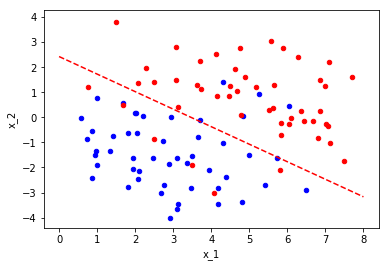

In [11]:
def graph_ineff(funct, x_range, cl='r--', show=False):
    y_range=[]                                                                                   
    for x in x_range:
        y_range.append(funct(x))
    plt.plot(x_range,y_range,cl)
    if show: plt.show()

ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')
plt.xlabel('x_1')
plt.ylabel('x_2')

theta=[theta0,theta12[0],theta12[1]]
print("theta={}".format(theta))
graph_ineff(lambda x1: (theta[0] + theta[1] * x1) / (- theta[2]),np.linspace(0,8,1000))

Outstanding questions: how do we know that $\ell(\phi,\mu_{-1},\mu_1,\Sigma)$ is maximized in any of these parameters when taking the gradient? I guess $\ell$ is concave in each of these parameters? I read somewhere that all distributions in the exponential family are concave (in which parameter?). And in the class notes, we saw that the Bernoulli and Gaussian (single-variable) distributions are both in the exponential family. So I guess $p(x|y)p(y)$ is in the exponential family?